# 2022-08-06 

### 에이다부스트

In [42]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [47]:
# 에이다부스트 모형 - 연습문제 # 1. 
import numpy as np
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
x = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

nm = range(100, 1100, 100) 
ac = []
ac_test = []
for i in np.arange(1,1500, 100) : 
    result = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=i, learning_rate=0.7)
    ac.append(cross_val_score(result, x, y, cv=5).mean())
    result.fit(x,y)
    ac_test.append(cross_val_score(result, x,y, cv=5).mean())

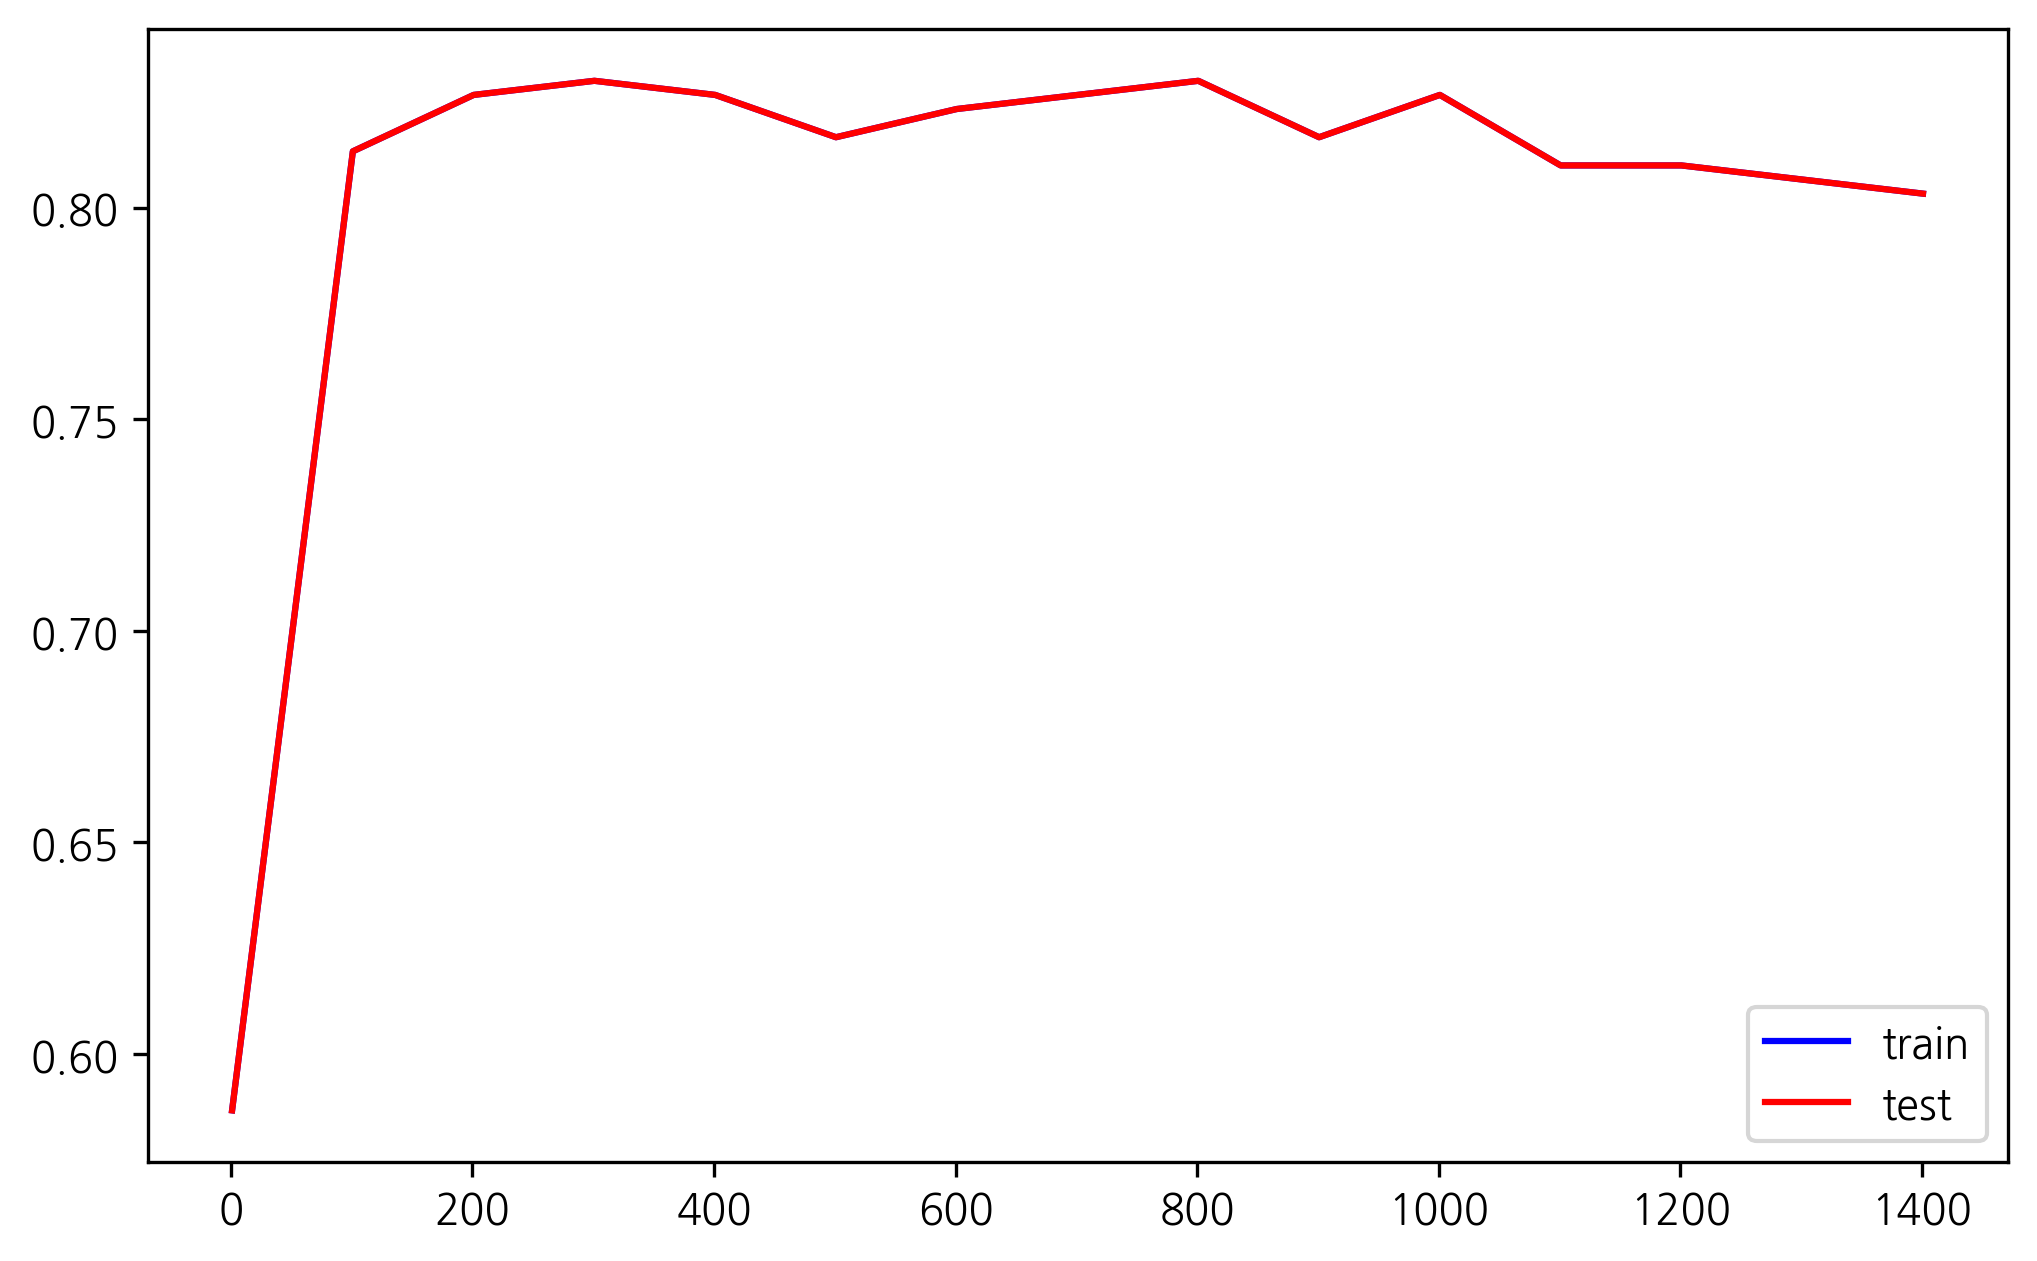

In [48]:
plt.plot(range(1, 1500, 100), ac, color='b', label='train')
plt.plot(range(1, 1500, 100), ac_test, color='r', label='test')
plt.legend() 
plt.show() 

In [31]:
# 2. 
import numpy as np 
from sklearn.model_selection import cross_val_score
li = []
for n in np.arange(0.1, 1.1, 0.1) : 
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=1000, learning_rate=n)
    li.append(cross_val_score(model, x, y, cv=5).mean())
li

[0.8233333333333333,
 0.8266666666666665,
 0.8333333333333333,
 0.8299999999999998,
 0.8233333333333333,
 0.8233333333333333,
 0.8233333333333333,
 0.82,
 0.8099999999999999,
 0.8133333333333332]

In [24]:
np.arange(0.1, 1.1, 0.1)[li.index(max(li))] # learning rate=0.3 일 때 가장 교차검증 성능 높게나왔다. 

0.30000000000000004

In [43]:
# 다시 시도
from sklearn.datasets import load_iris 
import pandas as pd 

data = load_iris()
x = data.data  
y = data.target 
feature_names = data.feature_names 

df = pd.concat([pd.DataFrame(x, columns=feature_names), pd.DataFrame(y, columns=['target'])], axis=1)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [44]:
df = df.query('target == 1 or target == 0') ; df 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

l = []
cl = []
for i in np.arange(1, 1101, 100) : 
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=i).fit(x_train, y_train)
    l.append(accuracy_score(y_train, model.predict(x_train)))
    cl.append(cross_val_score(model, x_test, y_test, cv=5).mean())

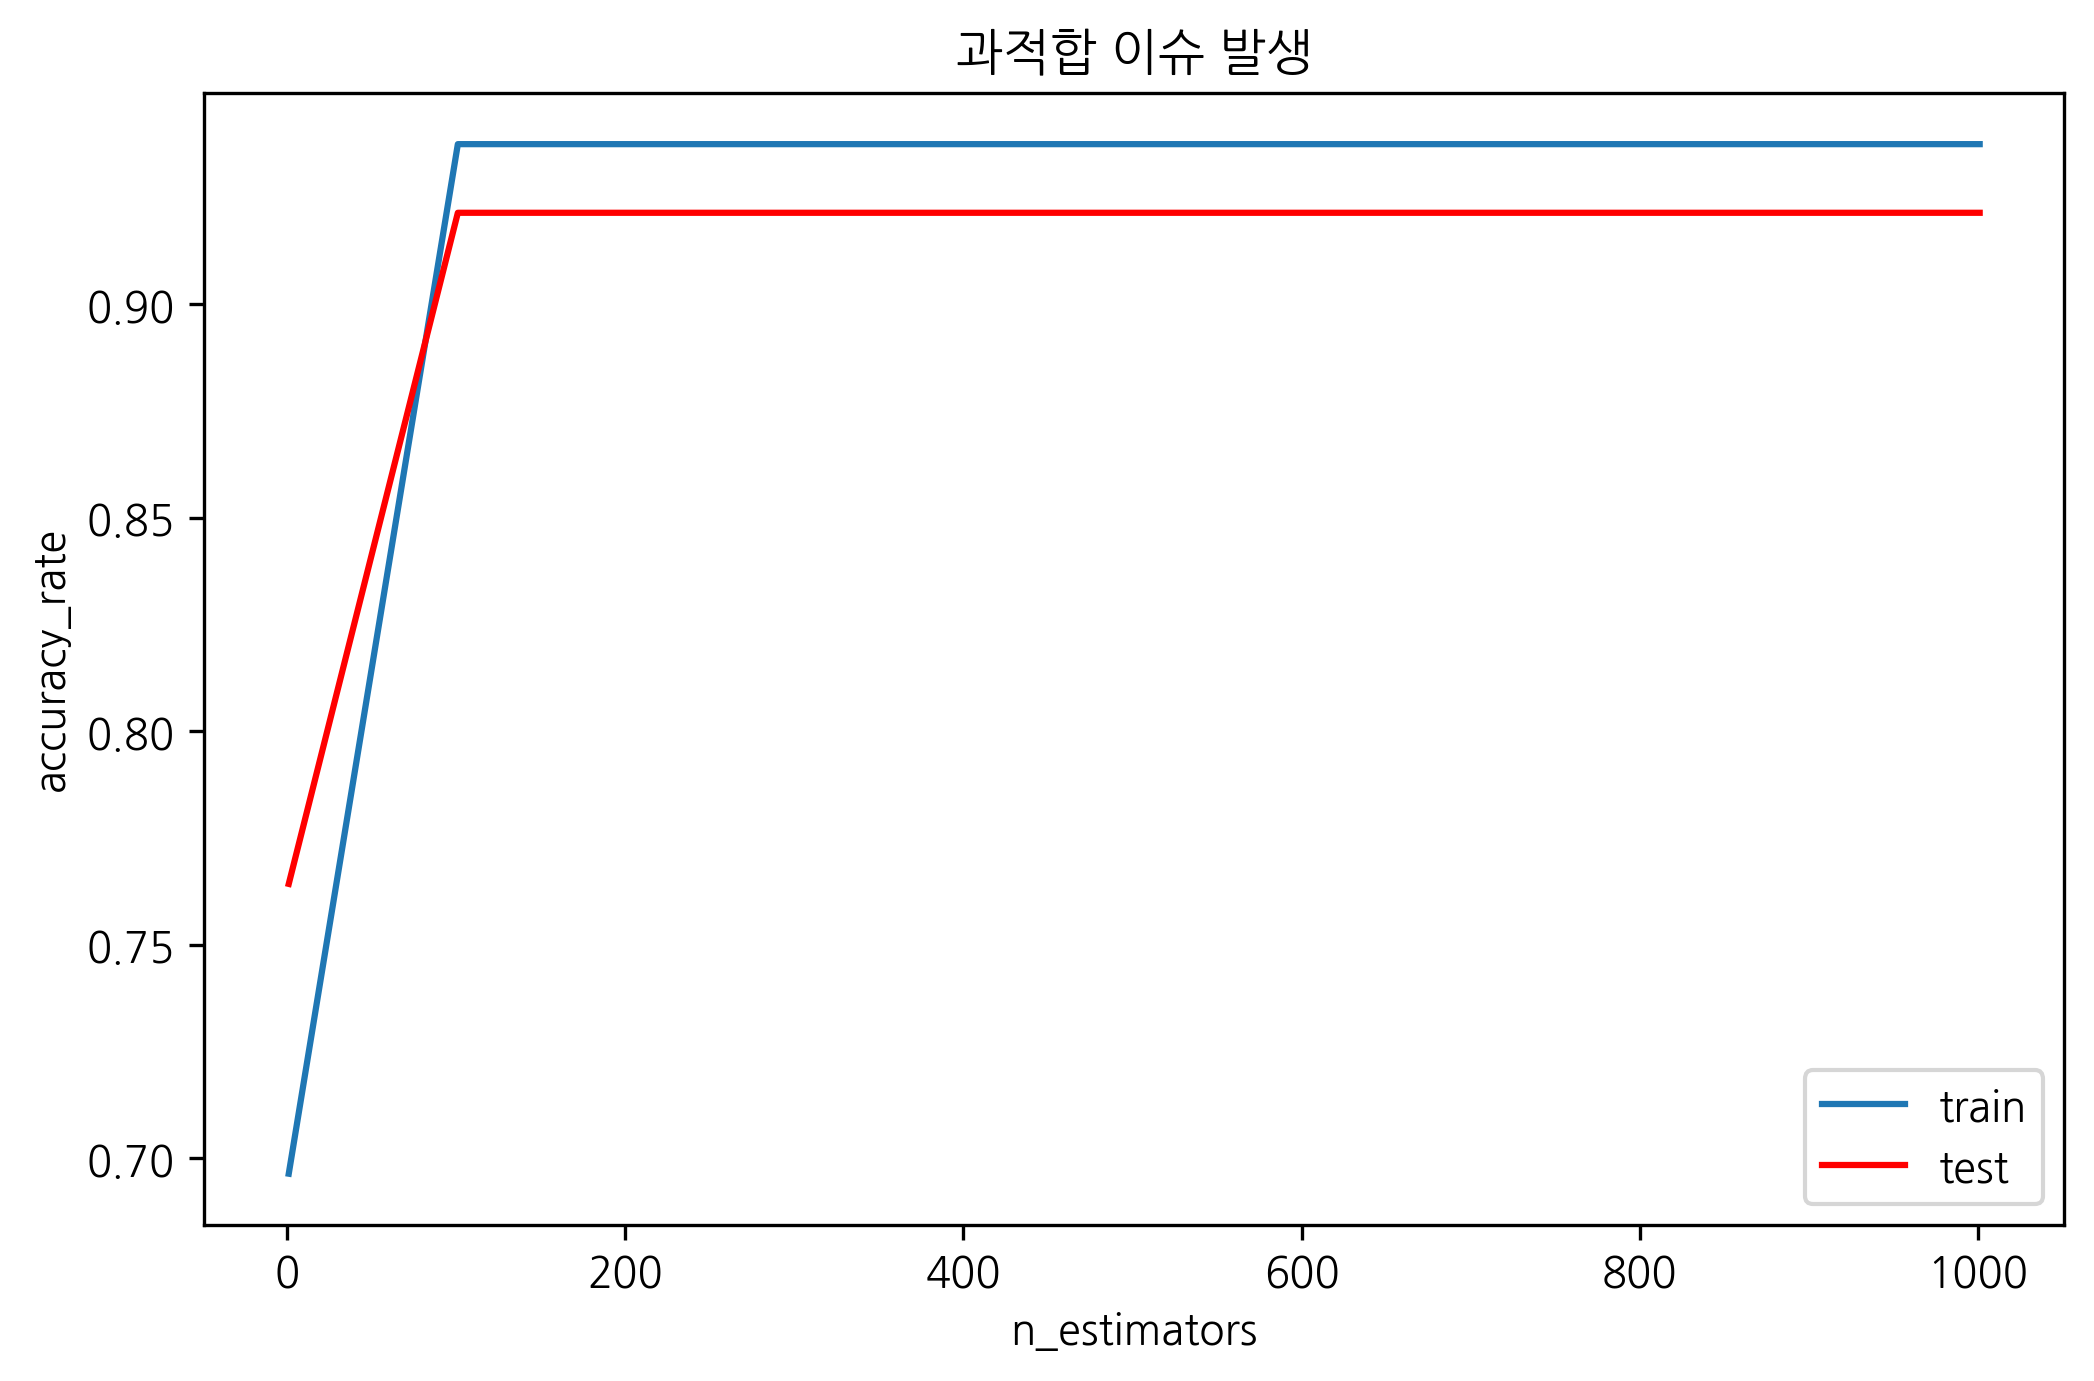

In [40]:
plt.plot(np.arange(1, 1101, 100), l, label='train')
plt.plot(np.arange(1, 1101, 100), cl, color='r', label='test')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('accuracy_rate')
plt.title('과적합 이슈 발생')
plt.show()

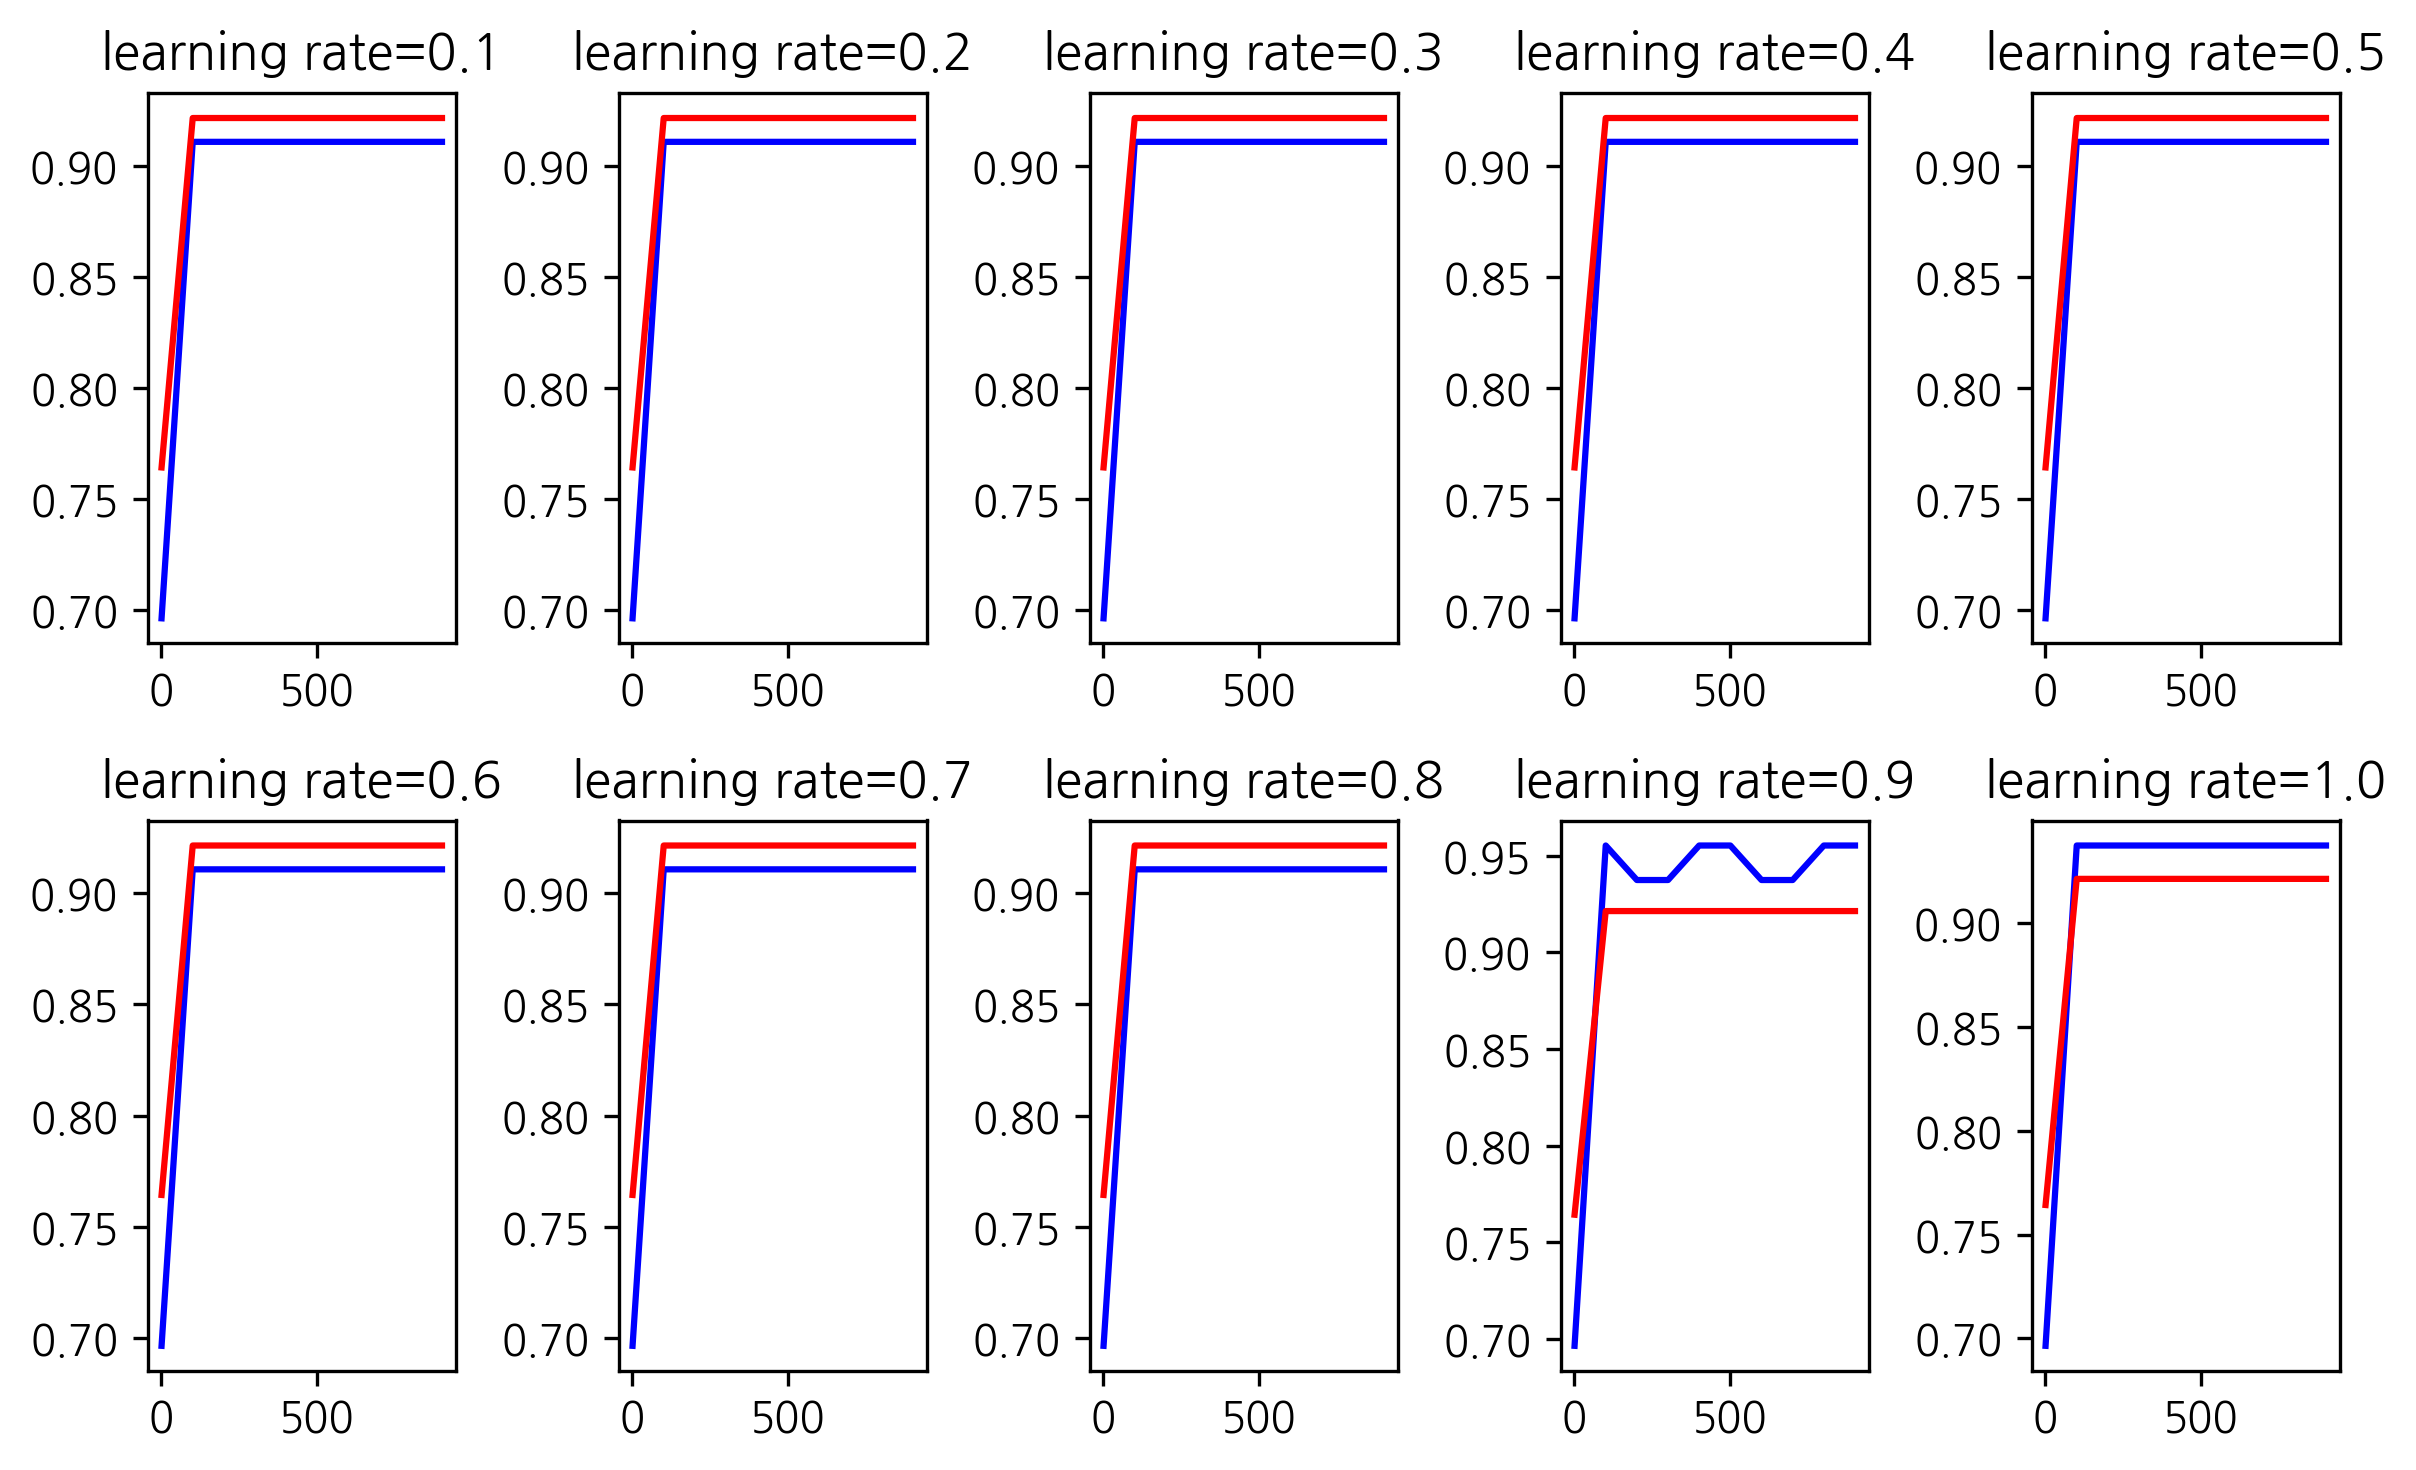

In [41]:
# learning rate 학습속도를 줄여서 과적합 최대한 억제해보자. 

l = []
cl = []
nn = 1
for x in np.arange(0.1, 1.1, 0.1) : 
    plt.subplot(2,5,nn)
    for i in np.arange(1, 1001, 100) : 
        model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=i, learning_rate=x).fit(x_train, y_train)
        l.append(accuracy_score(y_train, model.predict(x_train)))
        cl.append(cross_val_score(model, x_test, y_test, cv=5).mean())

    plt.plot(np.arange(1, 1001, 100), l, color='b', label='train')
    plt.plot(np.arange(1, 1001, 100), cl, color='r', label='test')
    plt.title(f'learning rate={round(x, 1)}')

    l = []
    cl = []
    nn += 1
plt.tight_layout() 
plt.show() 

In [18]:
%%time 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

mean_test_accuracy = []
for n in np.arange(1, 1001, 100):
    model1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n)
    mean_test_accuracy.append(cross_val_score(model1, X, y, cv=5).mean())

CPU times: user 9.13 s, sys: 52.1 ms, total: 9.18 s
Wall time: 9.18 s


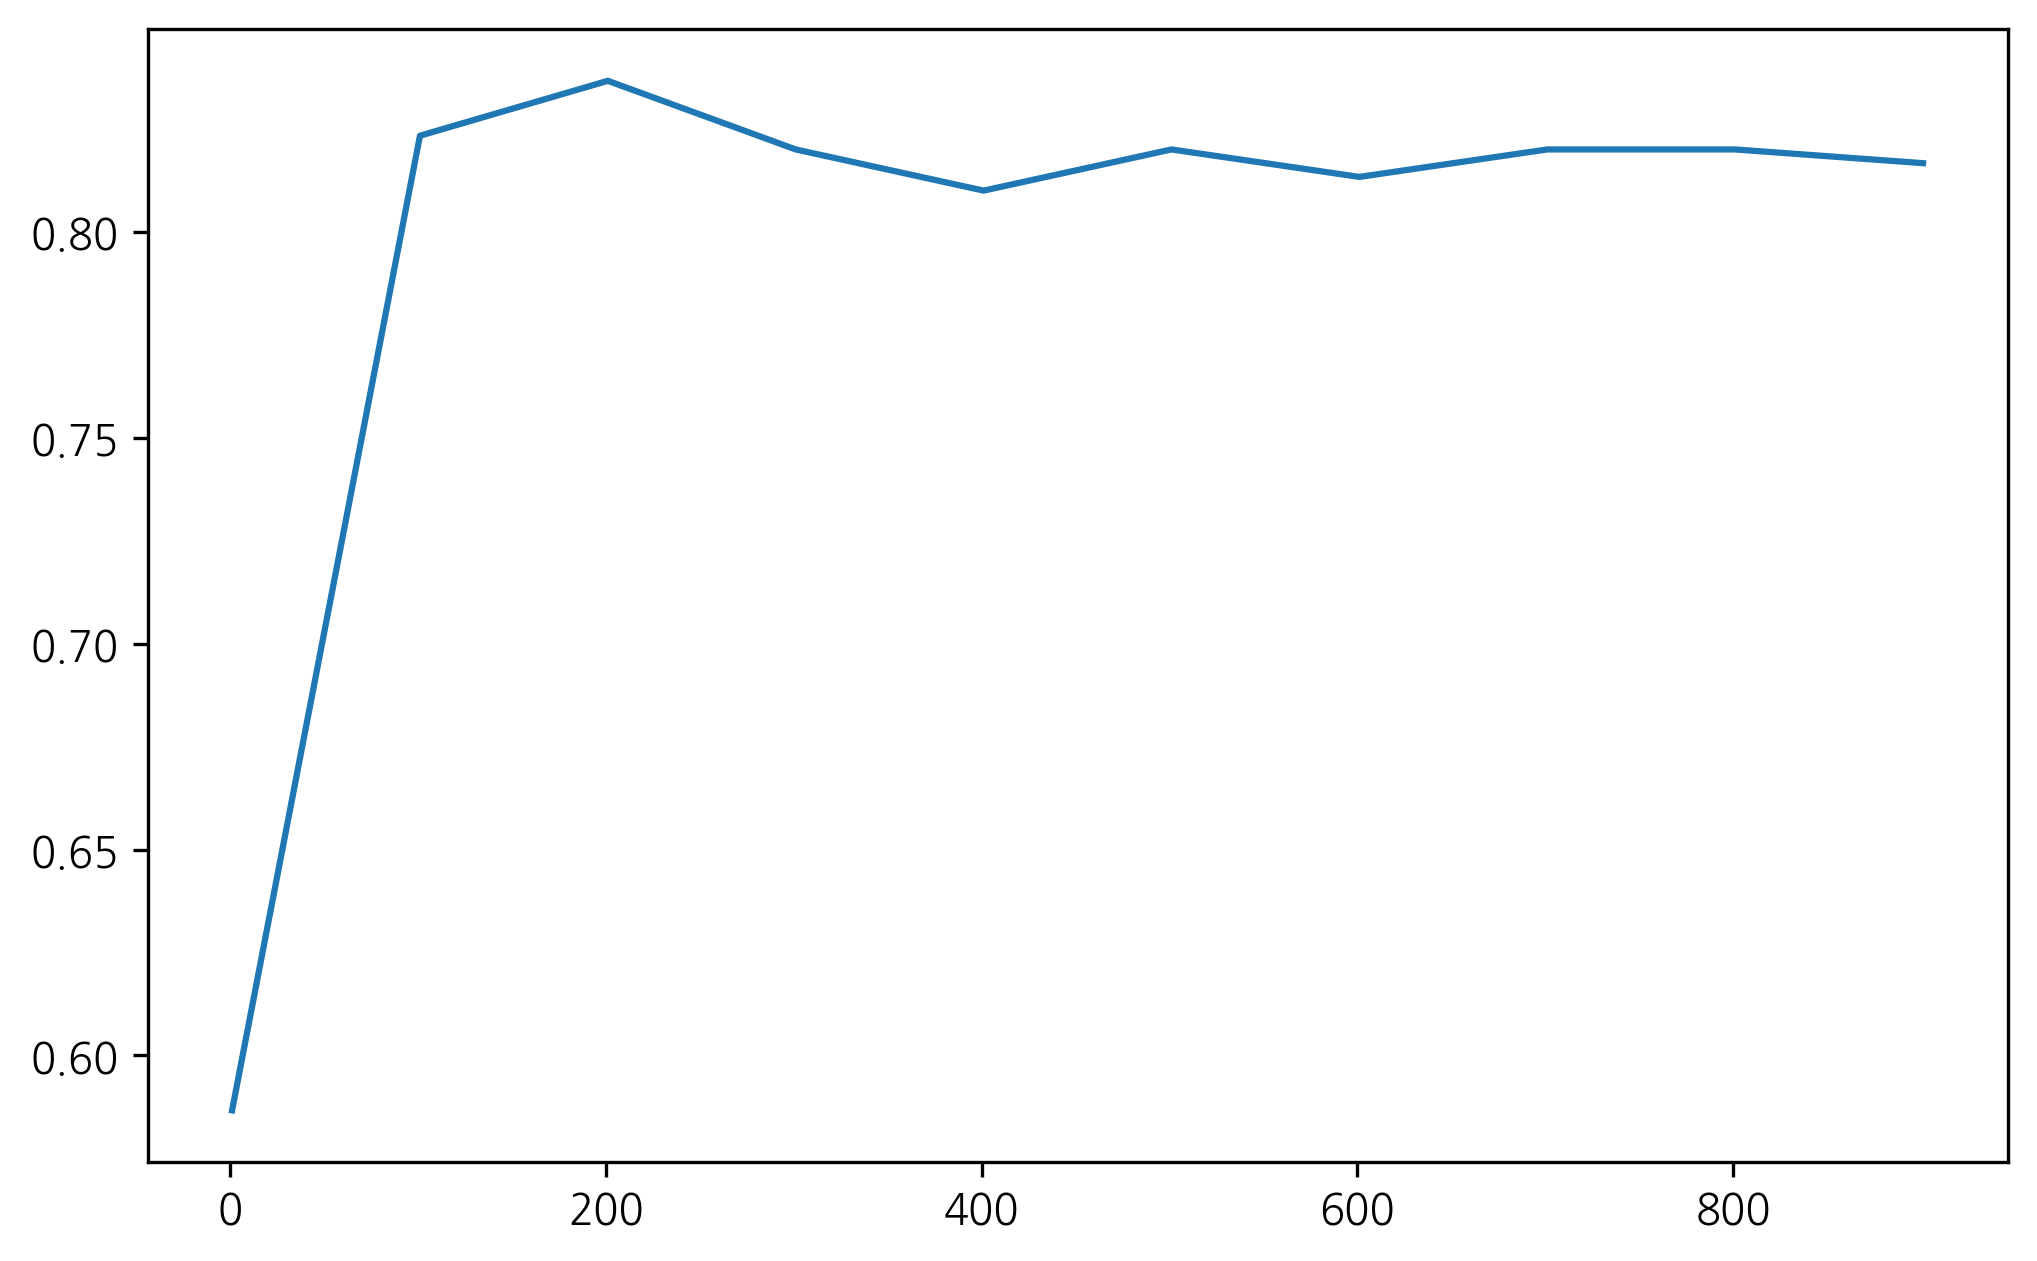

In [19]:
plt.plot(np.arange(1, 1000, 100), mean_test_accuracy)
plt.show()